In [1]:
import numpy as np
import matplotlib.colors as colors
import biotite
import biotite.structure as struc
import biotite.structure.io.mmtf as mmtf
import biotite.database.rcsb as rcsb
from bioview import setup_parameters, select, to_pymol, show
from pymol2 import PyMOL


pymol_app = PyMOL()
pymol_app.start()
setup_parameters(pymol_instance=pymol_app)
cmd = pymol_app.cmd

In [2]:
# General configuration
cmd.bg_color("white")
cmd.set("cartoon_side_chain_helper", 1)
cmd.set("cartoon_oval_length", 0.8)
cmd.set("depth_cue", 0)
cmd.set("valence", 0)

In [3]:
# Define colors used later
cmd.set_color("lightorange",  colors.to_rgb(biotite.colors["lightorange"]))
cmd.set_color("lightgreen",   colors.to_rgb(biotite.colors["lightgreen" ]))
cmd.set_color("darkgreen",    colors.to_rgb(biotite.colors["darkgreen"  ]))

 PyMOL not running, entering library mode (experimental)


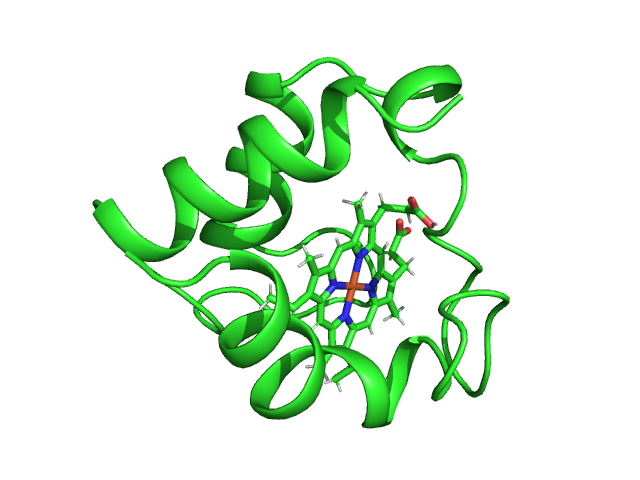

In [4]:
# Fetch and load cytochrome C structure and remove water 
mmtf_file = mmtf.MMTFFile.read(rcsb.fetch("1C75", "mmtf"))
structure = mmtf.get_structure(mmtf_file, model=1, include_bonds=True)
cyt_c = structure[structure.res_name != "HOH"]

to_pymol("cyt_c", cyt_c, pymol_instance=pymol_app)
show(pymol_instance=pymol_app)

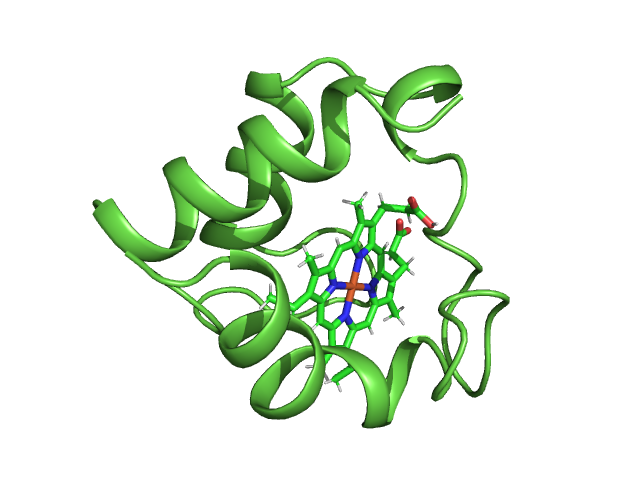

In [5]:
# Style protein
protein_mask = struc.filter_amino_acids(cyt_c)

cmd.show_as("cartoon", select("cyt_c", protein_mask))
cmd.color("lightgreen", select("cyt_c", protein_mask & (cyt_c.element == "C")))
show(pymol_instance=pymol_app)

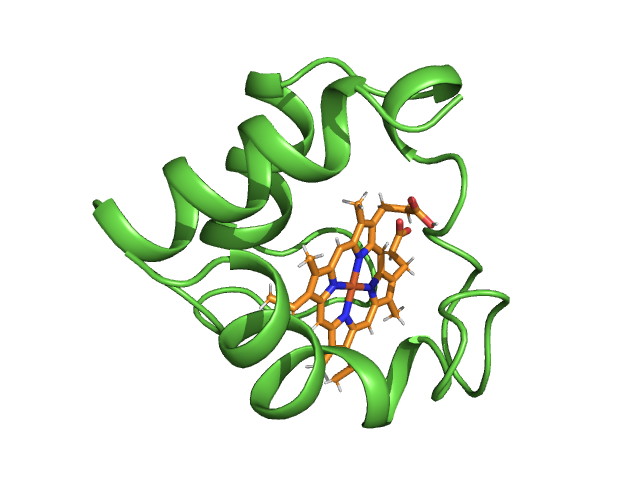

In [6]:
# Style heme group
heme_mask = (cyt_c.res_name == "HEM")

cmd.show_as("sticks", select("cyt_c", heme_mask))
cmd.color("lightorange", select("cyt_c", heme_mask & (cyt_c.element == "C")))
show(pymol_instance=pymol_app)

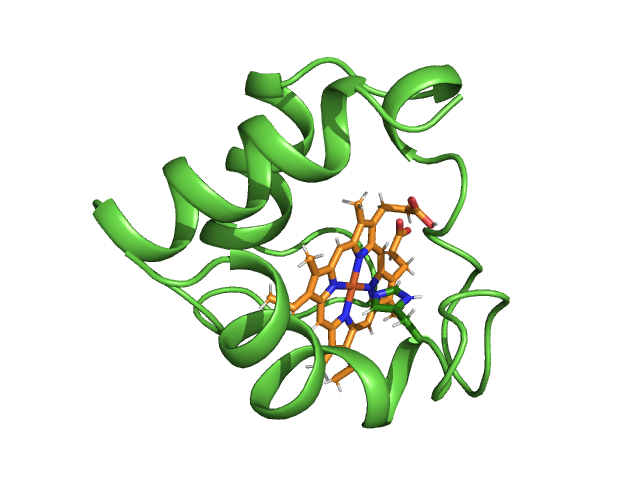

In [7]:
# Mark histidine bound to heme as sticks
heme_iron_mask = np.where(cyt_c.element == "FE")[0]
heme_iron_coord = cyt_c[heme_iron_mask].coord[0]
adjacency_mask = (struc.distance(cyt_c.coord, heme_iron_coord) < 2.0)
bound_nitrogen_mask = adjacency_mask & (cyt_c.res_name == "HIS")
his_mask = (cyt_c.res_id == cyt_c.res_id[bound_nitrogen_mask])

cmd.show("sticks", select("cyt_c", his_mask))
cmd.color("darkgreen", select(
    "cyt_c", his_mask & (cyt_c.element == "C") & (cyt_c.atom_name != "CA")
))
show(pymol_instance=pymol_app)

In [8]:
pymol_app.stop()